In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [2]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses = businesses.rename(columns = {'name':'business_name'})
print businesses.columns
businesses.head()
# dtype casts the column as a specific data type

Index([u'business_id', u'business_name', u'address', u'city', u'postal_code',
       u'latitude', u'longitude', u'phone_number', u'TaxCode',
       u'business_certificate', u'application_date', u'owner_name',
       u'owner_address', u'owner_city', u'owner_state', u'owner_zip'],
      dtype='object')


,business_id,business_name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [3]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections=inspections.rename(columns = {'date':'inspection_date'})
inspections['inspection_date'] = pd.to_datetime(inspections['inspection_date'].astype(str), format='%Y%m%d')
print inspections.columns
inspections.head()

Index([u'business_id', u'Score', u'inspection_date', u'type'], dtype='object')


,business_id,Score,inspection_date,type
0,10,NaN,2014-08-07,Reinspection/Followup
1,10,94.0,2014-07-29,Routine - Unscheduled
2,10,NaN,2014-01-24,Reinspection/Followup
3,10,92.0,2014-01-14,Routine - Unscheduled
4,19,94.0,2014-11-10,Routine - Unscheduled


In [4]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations=violations.rename(columns = {'date':'violation_date'})
violations['violation_date'] = pd.to_datetime(violations['violation_date'].astype(str), format='%Y%m%d')
print violations.columns
violations.head()

Index([u'business_id', u'violation_date', u'ViolationTypeID', u'risk_category',
       u'description'],
      dtype='object')


,business_id,violation_date,ViolationTypeID,risk_category,description
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [5]:
restaurant_scores  = inspections.merge(violations, left_on = ['business_id','inspection_date'],right_on = ['business_id','violation_date'], how = 'left')
#restaurant_scores.to_csv('merge_inner.csv')

In [6]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

restaurant_scores  = pd.merge(restaurant_scores, businesses, on='business_id', how='inner')
#restaurant_scores.to_csv('final.csv')


In [7]:
print restaurant_scores.isnull().sum()
print restaurant_scores.shape
print businesses.shape
print inspections.shape
print violations.shape

business_id                 0
Score                   15546
inspection_date             0
type                        0
violation_date          13432
ViolationTypeID         13432
risk_category           13444
description             13444
business_name               0
address                     0
city                     9067
postal_code              1348
latitude                15801
longitude               15801
phone_number            40994
TaxCode                     0
business_certificate     6535
application_date        14762
owner_name                102
owner_address             166
owner_city                243
owner_state               251
owner_zip                 383
dtype: int64
(57185, 23)
(7544, 16)
(27285, 4)
(39720, 5)


In [8]:
# 2 Which ten business have had the most inspections?
#restaurant_scores['business_id'].value_counts()

restaurant_scores.groupby('business_name').type.count().sort_values(ascending=False).head(15)


business_name
Peet's Coffee & Tea             151
Starbucks Coffee                100
Whole Foods Market               97
Specialty's Cafe & Bakery        88
KENTUCKY FRIED CHICKEN           80
Lers Ros Thai Noodle             78
San Francisco Soup Company       74
King of Thai Noodle House        69
Cafe Bakery                      67
Yama Sushi Restaurant            66
Hakka Restaurant                 66
Happy Donut                      63
Fresca Restaurant                63
STARBUCKS                        62
New Sun Hong Kong Restaurant     62
Name: type, dtype: int64

In [9]:
# 3 Group and count the inspections by type
restaurant_scores.groupby('type').type.count().sort_values(ascending=False)

type
Routine - Unscheduled                42054
Reinspection/Followup                 6020
Complaint                             3150
New Ownership                         2660
New Construction                      1635
Non-inspection site visit             1003
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  141
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [10]:
#restaurant_scores.columns

restaurant_scores['inspection_year'] = restaurant_scores['inspection_date'].dt.year 
restaurant_scores['inspection_month'] = restaurant_scores['inspection_date'].dt.month 


In [11]:
#restaurant_scores.drop('inspection_mnth_yr', axis=1, inplace=True)
restaurant_scores['inspection_mnth_yr'] = restaurant_scores['inspection_date'].apply(lambda x: x.strftime('%Y-%m'))     

Index([u'business_id', u'Score', u'inspection_date', u'type',
       u'violation_date', u'ViolationTypeID', u'risk_category', u'description',
       u'business_name', u'address', u'city', u'postal_code', u'latitude',
       u'longitude', u'phone_number', u'TaxCode', u'business_certificate',
       u'application_date', u'owner_name', u'owner_address', u'owner_city',
       u'owner_state', u'owner_zip', u'inspection_year', u'inspection_month',
       u'inspection_mnth_yr'],
      dtype='object')


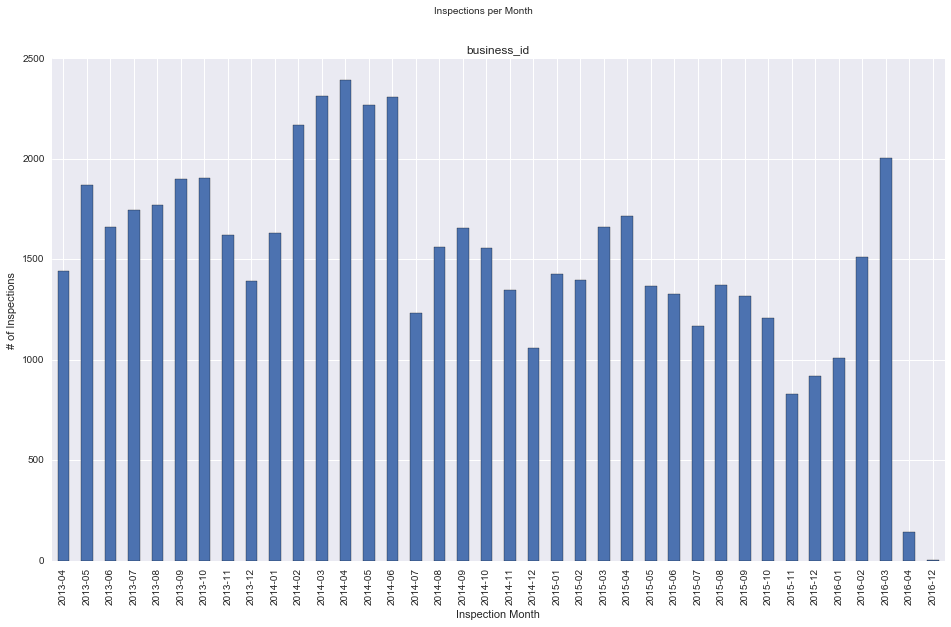

In [12]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
#sns.heatmap([restaurant_scores.inspection_month, restaurant_scores.type.count()], annot=True, fmt="d")

print restaurant_scores.columns
restaurant_scores.groupby(['inspection_mnth_yr']).business_id.count().plot(kind = 'bar', subplots = True, figsize = (16,9), title = "Inspections per Month")
plt.xlabel('Inspection Month')
plt.ylabel('# of Inspections')

In [13]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores[restaurant_scores.risk_category == 'High Risk'].groupby('postal_code').business_id.count().order(ascending=False).head(10)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


postal_code
94133    618
94103    569
94110    556
94122    460
94109    459
94102    450
94108    308
94107    266
94115    250
94114    236
Name: business_id, dtype: int64

In [14]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [15]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.groupby('description').business_id.count().sort_values(ascending=False).head()

description
Unclean or degraded floors walls or ceilings                          3746
Moderate risk food holding temperature                                2862
Inadequate and inaccessible handwashing facilities                    2689
Unapproved or unmaintained equipment or utensils                      2598
Wiping cloths not clean or properly stored or inadequate sanitizer    2504
Name: business_id, dtype: int64

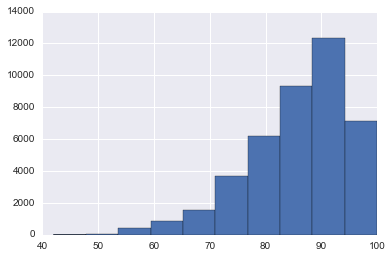

In [16]:
# 8 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins=10)

In [17]:
# 9 Can you predict risk category based on the other features in this dataset?

In [18]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

restaurant_scores[restaurant_scores.risk_category == 'High Risk'].sort(['Score'],ascending =False).head(5)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,business_id,Score,inspection_date,type,violation_date,ViolationTypeID,risk_category,description,business_name,address,...,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip,inspection_year,inspection_month,inspection_mnth_yr
23048,18825,100.0,2014-11-21,Routine - Unscheduled,2014-11-21,103112.0,High Risk,No hot water or running water,Fresca Restaurant,3945 24th St,...,395083.0,03/06/2006,Fresca Restaurants Inc.,3945 24th Street,SF,CA,94114,2014,11,2014-11
12069,3482,100.0,2015-04-10,Routine - Unscheduled,2015-04-10,103109.0,High Risk,Unclean or unsanitary food contact surfaces,Sears Fine Food,439 Powell St,...,945623.0,NaN,Lori's Diner Int'l Inc,439 Powell St,San Francisco,CA,94102,2015,4,2015-04
5793,1896,100.0,2014-02-11,Routine - Unscheduled,2014-02-11,103107.0,High Risk,Improper reheating of food,SIMPLE PLEASURES CAFE,3434 BALBOA St,...,396004.0,03/23/1994,SIMPLE PLEASURES CAFE INC,\t3434 BALBOA ST,SAN FRANCISCO,CA,94121,2014,2,2014-02
27607,36744,100.0,2013-04-26,Routine - Unscheduled,2013-04-26,103105.0,High Risk,Improper cooling methods,El Castillito Taqueria Star,250 Golden Gate Ave,...,445761.0,01/09/2008,Sadot Reyes,250 Golden Gate Ave,San Francisco,CA,94102,2013,4,2013-04
358,155,100.0,2015-12-29,Routine - Unscheduled,2015-12-29,103114.0,High Risk,High risk vermin infestation,CAFE COLE,609 Cole St,...,NaN,NaN,"ABU-ALI, ISAM",609 COLE,SF,CA,94117,2015,12,2015-12


In [19]:
############################
### A Little More Morbid ###
############################

In [20]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [21]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings = killings.rename(columns = {'lawenforcementagency':'agency','raceethnicity':'race'})
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [22]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [23]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.streetaddress.fillna(value='Unknown', inplace=True)

In [24]:
# 4. How many killings were there so far in 2015?
killings.groupby('year').year.count()

year
2015    467
Name: year, dtype: int64

In [25]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').year.count()

gender
Female     22
Male      445
Name: year, dtype: int64

In [26]:
# 6. How many killings were of unarmed people?
killings[killings.armed=='No'].armed.count()

102

In [27]:
# 7. What percentage of all killings were unarmed?
(killings[killings.armed=='No'].armed.count()*0.1)/(len(killings)*0.1)

0.21841541755888652

In [28]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [29]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

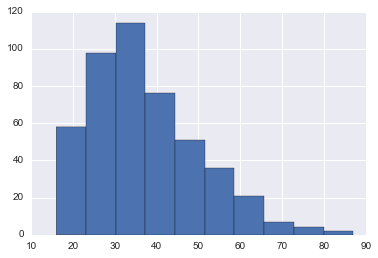

In [30]:
# 10. Display a histogram of ages of all killings
killings.age.hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C7A2940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C7F8CC0>]], dtype=object)

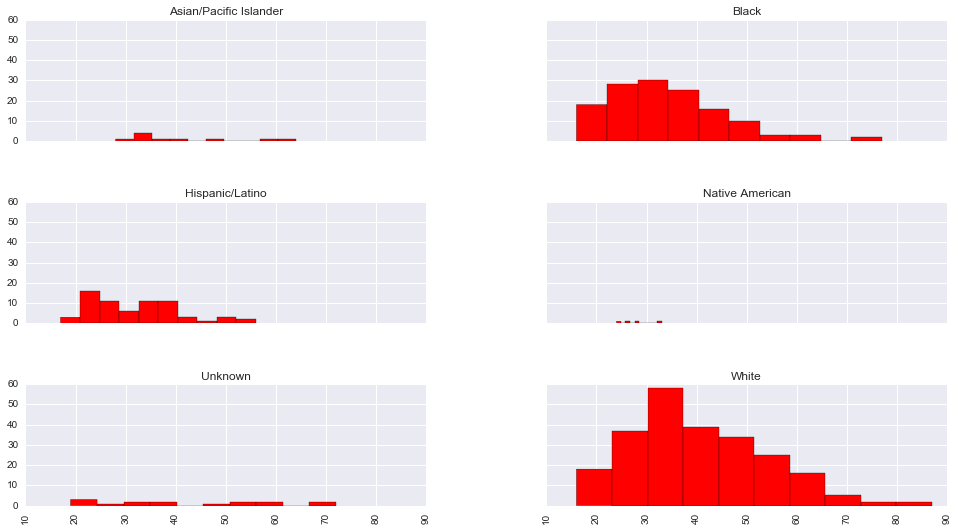

In [31]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race,figsize = (16,9), color = 'r', sharex = True, sharey = True)

In [32]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

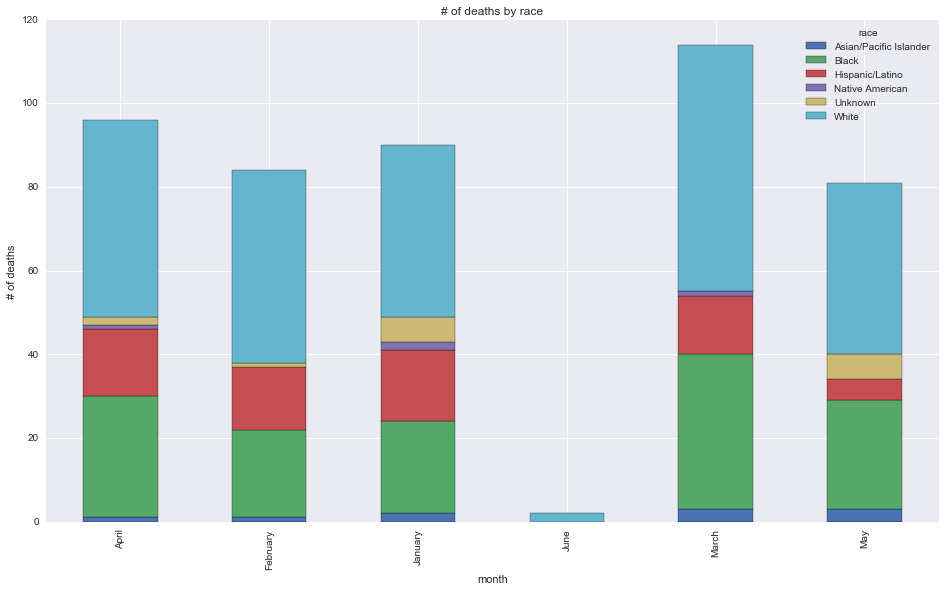

In [33]:
# 13. Show a bar chart with counts of deaths every month

killings.groupby(['month','race']).month.count().unstack('race').plot(kind = 'bar',  figsize = (16,9), stacked = True)
#killings.month.value_counts().plot(kind='bar',  title='# of deaths by month', columns = ['race'])
plt.title('# of deaths by race')
plt.xlabel('month')
plt.ylabel('# of deaths')


In [34]:
###################
### Less Morbid ###
###################

In [35]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()
majors.columns

Index([u'Unnamed: 0', u'Major_code', u'Major', u'Major_category', u'Total',
       u'Employed', u'Employed_full_time_year_round', u'Unemployed',
       u'Unemployment_rate', u'Median', u'P25th', u'P75th'],
      dtype='object')

In [36]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(['Employed_full_time_year_round', 'Major_code' ],inplace=True,axis=1)

In [37]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()


Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [38]:
# 3. What are the top 10 highest paying majors?
majors.head()
majors.groupby('Major').Median.sum().sort_values(ascending=False).head(10)

Major
PETROLEUM ENGINEERING                                  125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000
METALLURGICAL ENGINEERING                               96000
NUCLEAR ENGINEERING                                     95000
MINING AND MINERAL ENGINEERING                          92000
MATHEMATICS AND COMPUTER SCIENCE                        92000
ELECTRICAL ENGINEERING                                  88000
CHEMICAL ENGINEERING                                    86000
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                  85000
Name: Median, dtype: int64

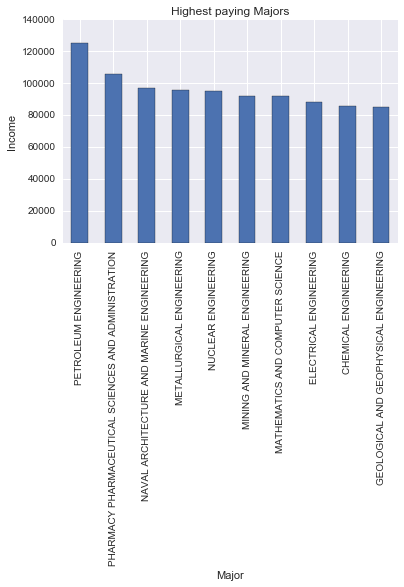

In [39]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors.groupby('Major').Median.sum().sort_values(ascending=False).head(10).plot(kind = 'bar',title = 'Highest paying Majors')
plt.xlabel('Major')
plt.ylabel('Income')

In [40]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean().sort_values(ascending=False)

Major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: Median, dtype: float64

In [41]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.sum().sort_values(ascending=False)

Major_category
Engineering                            2255000
Business                                788000
Computers & Mathematics                 729000
Biology & Life Science                  711500
Education                               701300
Humanities & Liberal Arts               691200
Health                                  677500
Physical Sciences                       624000
Agriculture & Natural Resources         550000
Social Science                          479000
Psychology & Social Work                401000
Industrial Arts & Consumer Services     368500
Arts                                    348200
Law & Public Policy                     264000
Communications & Journalism             198000
Interdisciplinary                        43000
Name: Median, dtype: int64

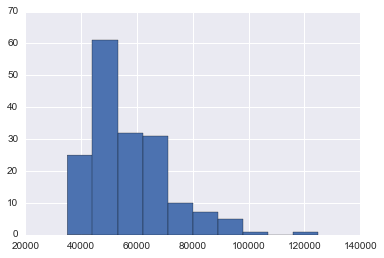

In [42]:
# 7. Plot a histogram of the distribution of median salaries

majors.Median.hist(bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F3F7978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000109B9668>]], dtype=object)

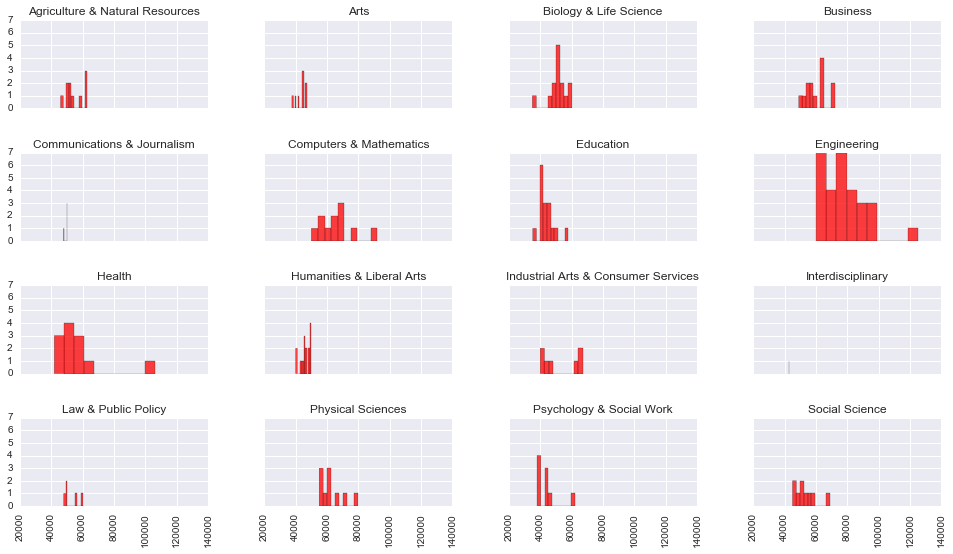

In [43]:
# 8. Plot a histogram of the distribution of median salaries by major category
#majors.Median.hist(by=majors.Major_category, bins = 10) 
majors.Median.hist(by=majors.Major_category, bins = 10, sharex=True, sharey=True,color='r', alpha=0.75, figsize = (16,9))

In [44]:
# 9. What are the top 10 most UNemployed majors?
majors.groupby('Major').Unemployed.sum().sort_values(ascending=False).head(10)

Major
BUSINESS MANAGEMENT AND ADMINISTRATION    147261
GENERAL BUSINESS                           85626
PSYCHOLOGY                                 79066
ACCOUNTING                                 75379
COMMUNICATIONS                             54390
ENGLISH LANGUAGE AND LITERATURE            52248
MARKETING AND MARKETING RESEARCH           51839
POLITICAL SCIENCE AND GOVERNMENT           40376
GENERAL EDUCATION                          38742
BIOLOGY                                    36757
Name: Unemployed, dtype: int64

In [45]:
# What are the unemployment rates?
majors.groupby('Major').Unemployment_rate.sum().sort_values(ascending=False).head(10)

Major
MISCELLANEOUS FINE ARTS                     0.156147
CLINICAL PSYCHOLOGY                         0.102712
MILITARY TECHNOLOGIES                       0.101796
SCHOOL STUDENT COUNSELING                   0.101746
LIBRARY SCIENCE                             0.094843
VISUAL AND PERFORMING ARTS                  0.094658
COMPUTER PROGRAMMING AND DATA PROCESSING    0.090264
SOCIAL PSYCHOLOGY                           0.087336
ASTRONOMY AND ASTROPHYSICS                  0.086022
ARCHITECTURE                                0.085991
Name: Unemployment_rate, dtype: float64

In [46]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category').Unemployed.mean().sort_values(ascending=False)


Major_category
Business                               33415.153846
Communications & Journalism            25299.750000
Social Science                         14683.333333
Arts                                   13015.625000
Humanities & Liberal Arts              11942.400000
Psychology & Social Work               11578.444444
Law & Public Policy                     8609.800000
Education                               7833.500000
Computers & Mathematics                 7270.363636
Health                                  6251.083333
Industrial Arts & Consumer Services     5765.714286
Engineering                             5047.896552
Biology & Life Science                  4095.357143
Physical Sciences                       3822.100000
Interdisciplinary                       2990.000000
Agriculture & Natural Resources         1855.100000
Name: Unemployed, dtype: float64

In [47]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['Sample_employment_rate'] = (majors.Employed * 0.1) / (majors.Total * 0.1)

In [48]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['Sample_unemployment_rate'] = 1 - majors.Sample_employment_rate
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,Sample_employment_rate,Sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
